# Part 1: Modelling

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib


In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\teah1\\Downloads\\DSI-Instructor-Challenge'

## Load dataset

In [4]:
field_names = np.loadtxt(os.path.join('part-1-dataset', 'field_names.txt'), dtype = str, delimiter="\n")


In [5]:
df =pd.read_csv(os.path.join('part-1-dataset','breast-cancer.csv'),names=list(field_names))


In [6]:
field_names.shape

(32,)

In [7]:
df

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


To randomly create multiple dataset from this given dataset, one approach is 'boostrap sampling', which is sampling with replacement. We can write a boostrap sampling function by pandas

In [8]:
def bootstrap_sampling(df, size = None, random_seed = 0):
    if size == None:
        size = df.shape[0]
    bootstrap_samples = df.sample(size, replace = True, random_state = random_seed).copy()
    return bootstrap_samples

In [9]:
bootstrap_df = bootstrap_sampling(df)

In [10]:
bootstrap_df

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559
359,901034301,B,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
277,8911670,M,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,9012315,M,16.350,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.380,31.03,129.30,1165.0,0.14150,0.46650,0.7087,0.22480,0.4824,0.09614
341,898143,B,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,...,10.750,23.07,71.25,353.6,0.12330,0.34160,0.4341,0.08120,0.2982,0.09825
382,90250,B,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,...,12.570,28.71,87.36,488.4,0.08799,0.32140,0.2912,0.10920,0.2191,0.09349
370,9012315,M,16.350,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.380,31.03,129.30,1165.0,0.14150,0.46650,0.7087,0.22480,0.4824,0.09614


## Data Visualization

Before going into any statistical analysis, it is a good practice to visualize data distribution between 2 groups malignant ('diagnosis' = 'M') and benign ('diagnosis' = B).

We visualize the data scattering and plot data distributions of the data in the next figures. These figures would provide some hint on the difference of data distributions. Data visualization also help to confirm any statistical findings later.

In addition, the data scattering would let us know if there is any outlier in the dataset.

In [11]:
# extract data from each group
malignant_diagnosis_df = df[df['diagnosis'] == 'M'].drop(columns = ['ID', 'diagnosis'])
benign_diagnosis_df = df[df['diagnosis'] == 'B'].drop(columns = ['ID', 'diagnosis'])

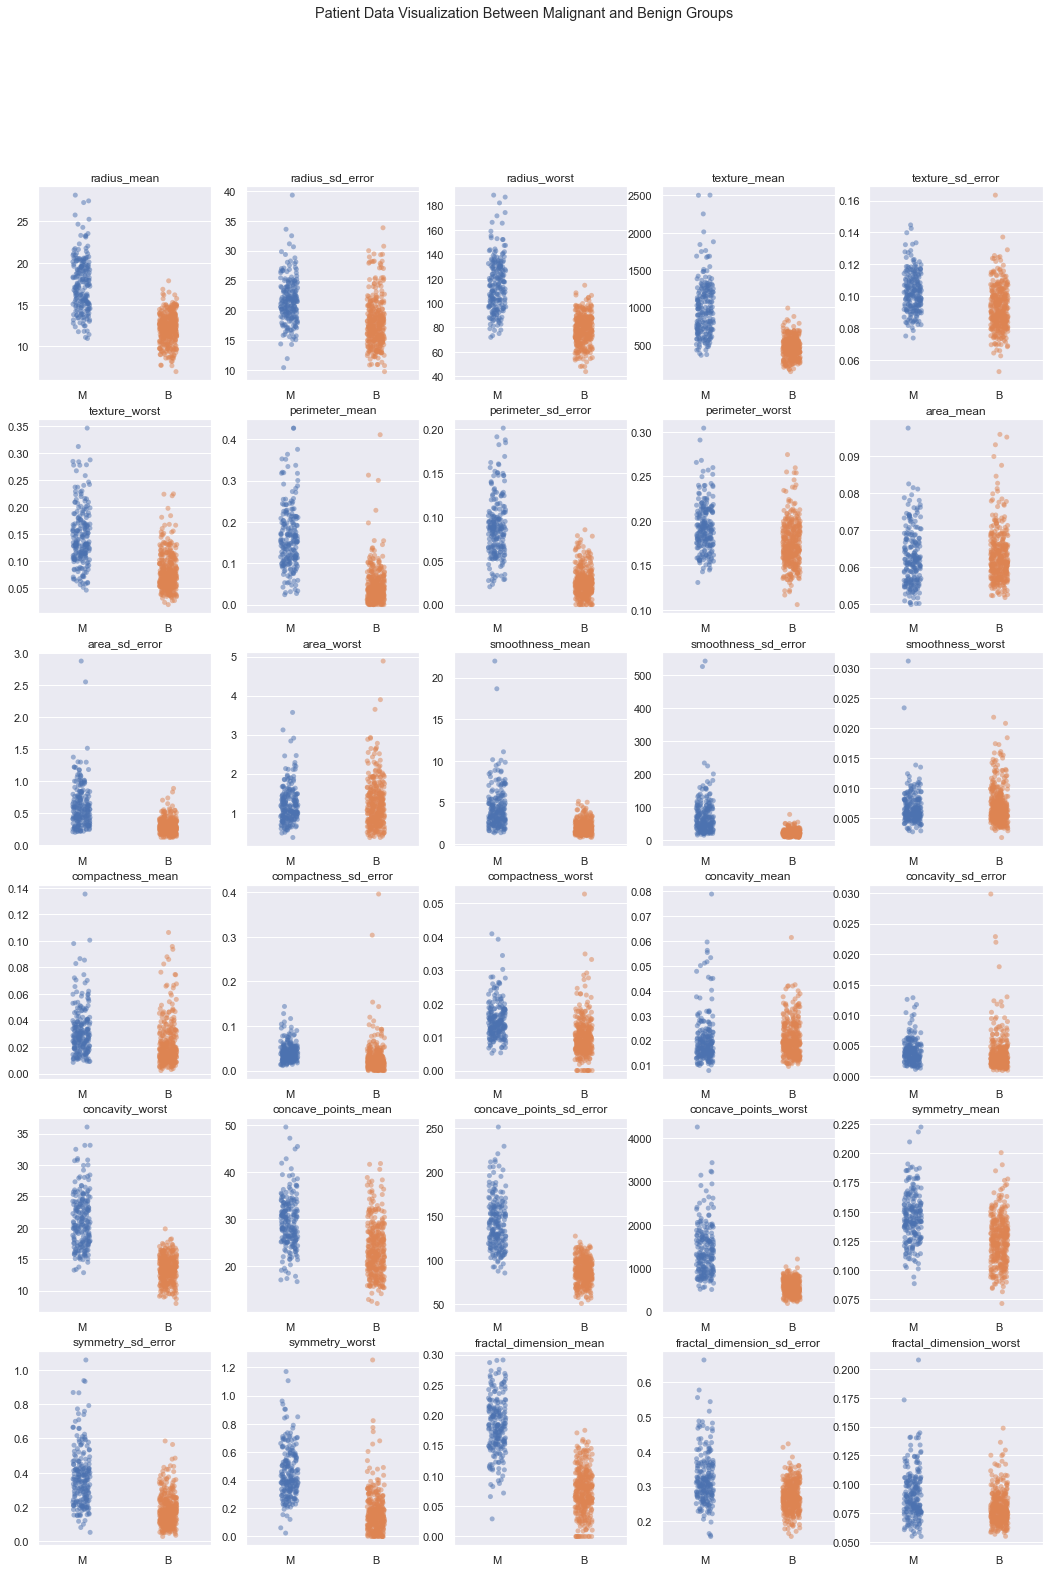

In [12]:
# visualize data scattering
fig, axes = plt.subplots(6, 5, figsize=(18, 25))
fig.suptitle('Patient Data Visualization Between Malignant and Benign Groups')
indices = malignant_diagnosis_df.keys()
for k, ax in enumerate(axes.flat):
    sns.stripplot(ax = ax,x="diagnosis", y=indices[k], data=df,jitter=True,
                       dodge=True, 
                       marker='o', 
                       alpha=0.5).set_title(indices[k])#,fontsize=50)
    ax.axes.set_xlabel('')
    ax.axes.set_ylabel('')

fig.savefig("customers_data_visualization_comparison_scatter.pdf")

At first glance, there seems no outlier in the data. And data indicates some significant difference between 2 groups in some features such as 'concavity_worse', 'concave_points_worst', etc. 

We now plot the distribution of different features in regards to malignant/benign groups. The distribution visualization would describe the mean and variance comparison between groups.

<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-13-299177b2818c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-inpu

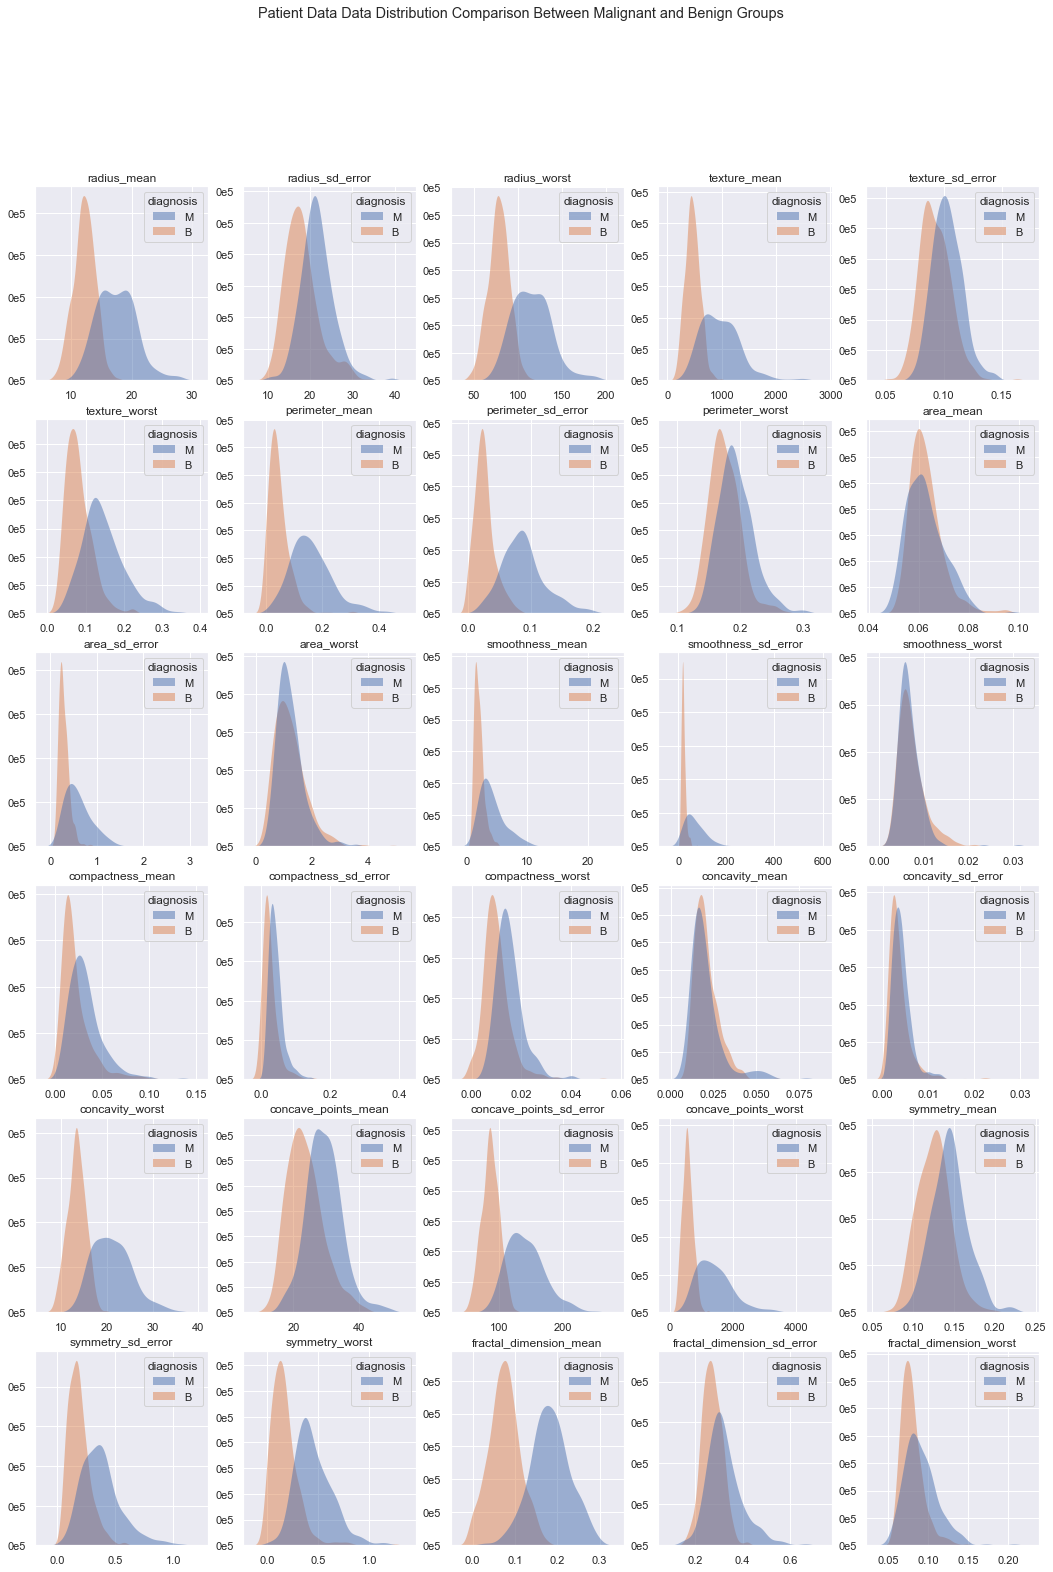

In [13]:
# We set up a canvas to plot data distributions of our 6 x 5 = 30 features. This is done by creating 30 subfigures, one for each feature.
# Depending on your computer/laptop screen, you can experiment different size of the data distribution plot figsize = (horizontal size, vertical size)
fig, axes = plt.subplots(6, 5, figsize=(18, 25))
# Setting the figure name
fig.suptitle('Patient Data Data Distribution Comparison Between Malignant and Benign Groups')
# we get the list of feature names to put into the corresponding subfigures.
indices = malignant_diagnosis_df.keys()
# this for loop to plot features one by one by going through each of  6 x 5 = 30 subfigures. 
for k, ax in enumerate(axes.flat):
    sns.kdeplot(ax = ax, x=indices[k], hue="diagnosis",data=df,
       fill=True, common_norm=False,
       alpha=.5, linewidth=0,
    ).set_title(indices[k])
    ax.axes.set_xlabel('')
    ax.axes.set_ylabel('')
#     if df[indices[k]].max()>100000:
    ylabels = ['{:,.0f}'.format(x) + 'e5' for x in ax.get_yticks()/100000]
    ax.set_yticklabels(ylabels)

# we save the figure to a pdf file named "diagnosis_data_comparison.pdf" for the use in any report later. By default, the file is saved in the same directory with the running jupyter notebook.
fig.savefig("diagnosis_data_distribution_comparison.pdf")

We notice there are difference in distributions of patient features. 

Furthermore, let us analysize whether any strong correlated variables in our data. A rule of thumb to reduce redundant variables in any regression model is to remove any features strongly correlated with other main features.

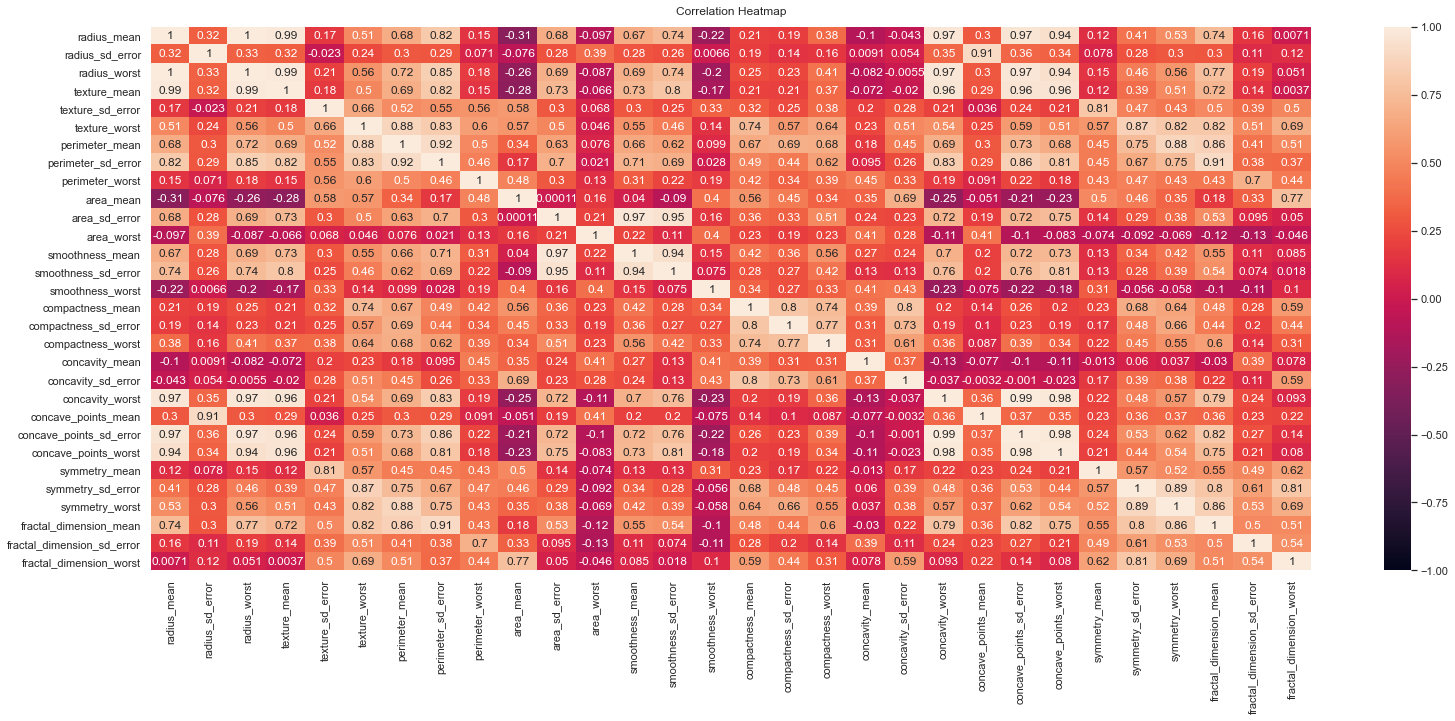

In [14]:
plt.figure(figsize=(26, 10))
correlation_matrix = df[malignant_diagnosis_df.keys()].corr()
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)#
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('combined_data_correlation.pdf')

Based on the correlation matrix, we find that 'radius_mean' to be strongly related to 'textture_mean', hence later in our model simplification, we can choose to keep only one of them.

## Statistically Analysis

From the data, we have 30 continuous features, to perform statistics analysis for 2 groups malignant (df['diagnosis'] == 'M') and benign (df['diagnosis'] == 'B'), we would 

- conduct T-test* to see whether any difference between mean values of these 2 groups. **Note** : For discrete features, we could use Chi-square test.
- perform feature selection based on conventional metrics namely ANOVA-f Statistic and Mutual Information Gain.



### T-test for mean values

In [15]:
# extract data from each group
malignant_diagnosis_df = df[df['diagnosis'] == 'M'].drop(columns = ['ID', 'diagnosis'])
benign_diagnosis_df = df[df['diagnosis'] == 'B'].drop(columns = ['ID', 'diagnosis'])

Before doing any furthure analysis or model development, we quickly check if the data is balance or imbalance. Imbalance dataset requires techniques such as oversampling or undersampling.

In [16]:
malignant_diagnosis_df.shape

(212, 30)

In [17]:
benign_diagnosis_df.shape

(357, 30)

Based on the datasize of 2 groups, we find that data is quite balance.

Now, let us do mean analysis

In [18]:
malignant_diagnosis_means = malignant_diagnosis_df.mean(axis = 0)
benign_diagnosis_means = benign_diagnosis_df.mean(axis = 0)

In [19]:
ttest_patient_ts = []
ttest_patient_ps = []

for k in malignant_diagnosis_df.keys():
    col1 = malignant_diagnosis_df[k].dropna()
    col2 = benign_diagnosis_df[k].dropna()
    t, p = stats.ttest_ind(col2, col1, equal_var = False, nan_policy='omit')
    ttest_patient_ts.append(t)
    ttest_patient_ps.append(p)

M_B_means = pd.DataFrame({'Malignant_Group': malignant_diagnosis_means.values, 'Benign_Group': benign_diagnosis_means.values, 'p_values':ttest_patient_ps},index=list(malignant_diagnosis_df.keys()))
M_B_means

,Malignant_Group,Benign_Group,p_values
radius_mean,17.462830,12.146524,1.684459e-64
radius_sd_error,21.604906,17.914762,3.019055e-25
radius_worst,115.365377,78.075406,1.023141e-66
texture_mean,978.376415,462.790196,3.284366e-52
texture_sd_error,0.102898,0.092478,5.573331e-19
texture_worst,0.145188,0.080085,9.607863e-42
perimeter_mean,0.160775,0.046058,3.742121e-58
perimeter_sd_error,0.087990,0.025717,3.127316e-71
perimeter_worst,0.192909,0.174186,5.957651e-15
area_mean,0.062680,0.062867,7.667216e-01


A rule of thumb to determine if there is difference between 2 mean values is to check if the p_value is smaller than a default significance level alpha = 0.05. The smaller p_value, the more confident we can conclude that 2 mean values are different.

Based on p values, there are significant differences between the means of malignant and benign groups in 26 features, which are:

In [20]:
M_B_means[M_B_means.p_values<0.05].index

Index(['radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean',
       'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_sd_error',
       'smoothness_mean', 'smoothness_sd_error', 'compactness_mean',
       'compactness_sd_error', 'compactness_worst', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

T-test can also be used to rank the feature importances by the p-values, the smaller the p-value is, the more significant the feature is.

In [21]:
M_B_means[M_B_means.p_values<0.05].sort_values(by = 'p_values')

,Malignant_Group,Benign_Group,p_values
fractal_dimension_mean,0.182237,0.074444,1.061454e-96
concave_points_sd_error,141.370330,87.005938,1.032730e-72
perimeter_sd_error,0.087990,0.025717,3.127316e-71
concavity_worst,21.134811,13.379801,3.556557e-71
radius_worst,115.365377,78.075406,1.023141e-66
radius_mean,17.462830,12.146524,1.684459e-64
symmetry_worst,0.450606,0.166238,9.852484e-59
perimeter_mean,0.160775,0.046058,3.742121e-58
concave_points_worst,1422.286321,558.899440,4.937924e-54
texture_mean,978.376415,462.790196,3.284366e-52


Based on the p_values, we can identify the top features to be 'fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst', 'radius_worst', 'radius_mean', 'symmetry_worst', 'perimeter_mean', 'concave_points_worst'

### Exploratory Analysis

Other tools to quantify importance of features are F-Statistics and Mutual Information Gain. These metrics are provided in sklearn library.

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [23]:
X_df = df.drop(columns = ['ID', 'diagnosis'])
Y_df = df['diagnosis']
#compute the f-statistics values
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_df, Y_df)
f_statistic_scores = fs.scores_
#compute mutual information gain values
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_df, Y_df)
mutual_info_scores = fs.scores_


Let us combine all statistics into a same table to make a comparison.

In [24]:
M_B_statistics = pd.DataFrame({'Malignant_Group': malignant_diagnosis_means.values, 'Benign_Group': benign_diagnosis_means.values, 'p_values':ttest_patient_ps, 'f-statistics':f_statistic_scores, 'mutual_info':mutual_info_scores},index=list(malignant_diagnosis_df.keys()))

In [25]:
M_B_statistics

,Malignant_Group,Benign_Group,p_values,f-statistics,mutual_info
radius_mean,17.462830,12.146524,1.684459e-64,646.981021,0.365555
radius_sd_error,21.604906,17.914762,3.019055e-25,118.096059,0.101255
radius_worst,115.365377,78.075406,1.023141e-66,697.235272,0.402890
texture_mean,978.376415,462.790196,3.284366e-52,573.060747,0.363147
texture_sd_error,0.102898,0.092478,5.573331e-19,83.651123,0.077521
texture_worst,0.145188,0.080085,9.607863e-42,313.233079,0.210693
perimeter_mean,0.160775,0.046058,3.742121e-58,533.793126,0.372972
perimeter_sd_error,0.087990,0.025717,3.127316e-71,861.676020,0.440609
perimeter_worst,0.192909,0.174186,5.957651e-15,69.527444,0.060612
area_mean,0.062680,0.062867,7.667216e-01,0.093459,0.007382


In [26]:
list(M_B_statistics.sort_values(by = 'f-statistics', ascending = False).index)[:5]

['fractal_dimension_mean',
 'concave_points_sd_error',
 'perimeter_sd_error',
 'concavity_worst',
 'radius_worst']

In [27]:
list(M_B_statistics.sort_values(by = 'mutual_info', ascending = False).index)[:5]

['concave_points_sd_error',
 'concave_points_worst',
 'concavity_worst',
 'perimeter_sd_error',
 'fractal_dimension_mean']

In [28]:
list(M_B_statistics.sort_values(by = 'p_values').index)[:5]

['fractal_dimension_mean',
 'concave_points_sd_error',
 'perimeter_sd_error',
 'concavity_worst',
 'radius_worst']

Although there is difference in ranking of features, all 3 metrics agree on the top features to be 'fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst'.

In [29]:
M_B_statistics.loc[['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst']]

,Malignant_Group,Benign_Group,p_values,f-statistics,mutual_info
fractal_dimension_mean,0.182237,0.074444,1.061454e-96,964.385393,0.435592
concave_points_sd_error,141.370330,87.005938,1.032730e-72,897.944219,0.473115
perimeter_sd_error,0.087990,0.025717,3.127316e-71,861.676020,0.440609
concavity_worst,21.134811,13.379801,3.556557e-71,860.781707,0.453000


The mean values of Malignant_Group for these top features 'fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst' are significantly higher than Benign_Group. In particular, the mean values of 'fractal_dimension_mean' and 'perimeter_sd_error' of Malignant_Group are more than 2 times larger than Benign_Group's. The mean values of 'concave_points_sd_error' and 'concavity_worst' of Malignant_Group are more than 1.5 times larger than Benign_Group's.

Through the box plot below, we find that 50% of the data for these key features (instance values in the boxes) of these 2 groups are segregated from each other, which indicates an distinction in values between 2 groups.

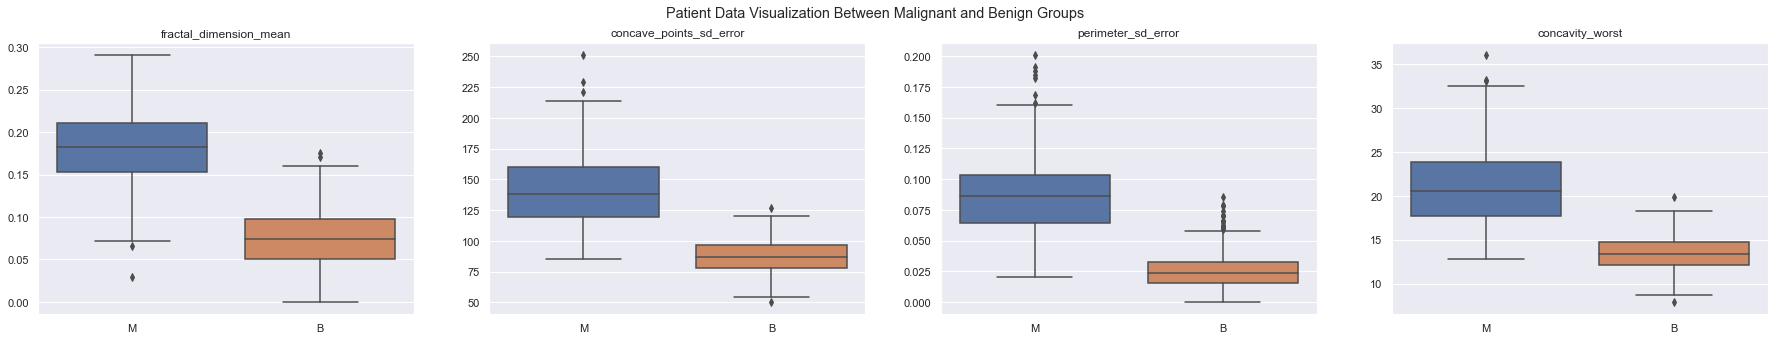

In [30]:
# visualize data mean and distribution
fig, axes = plt.subplots(1, 4, figsize=(31, 5))
fig.suptitle('Patient Data Visualization Between Malignant and Benign Groups')
indices = ['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst']
for k, ax in enumerate(axes.flat):
    sns.boxplot(ax = ax,x="diagnosis", y=indices[k], data=df).set_title(indices[k])#,fontsize=50)
    ax.axes.set_xlabel('')
    ax.axes.set_ylabel('')

<ipython-input-31-313972d5fe31>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-31-313972d5fe31>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-31-313972d5fe31>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-31-313972d5fe31>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


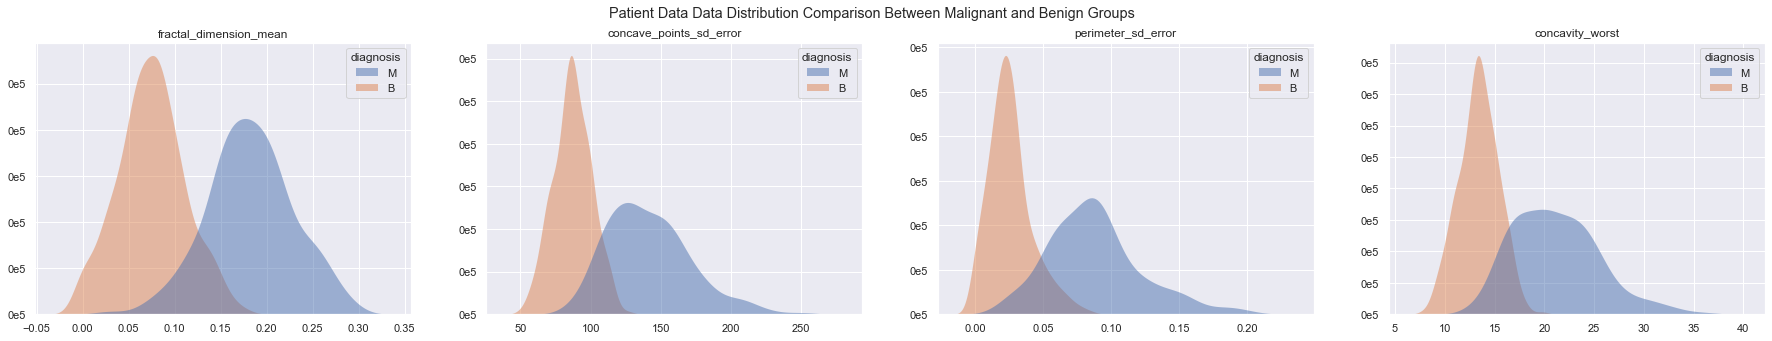

In [31]:
# We set up a canvas to plot data distributions of our 6 x 5 = 30 features. This is done by creating 30 subfigures, one for each feature.
# Depending on your computer/laptop screen, you can experiment different size of the data distribution plot figsize = (horizontal size, vertical size)
fig, axes = plt.subplots(1, 4, figsize=(31, 5))
# Setting the figure name
fig.suptitle('Patient Data Data Distribution Comparison Between Malignant and Benign Groups')
# we get the list of feature names to put into the corresponding subfigures.
indices = ['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst']
# this for loop to plot features one by one by going through each of  6 x 5 = 30 subfigures. 
for k, ax in enumerate(axes.flat):
    sns.kdeplot(ax = ax, x=indices[k], hue="diagnosis",data=df,
       fill=True, common_norm=False,
       alpha=.5, linewidth=0,
    ).set_title(indices[k])
    ax.axes.set_xlabel('')
    ax.axes.set_ylabel('')
#     if df[indices[k]].max()>100000:
    ylabels = ['{:,.0f}'.format(x) + 'e5' for x in ax.get_yticks()/100000]
    ax.set_yticklabels(ylabels)

# we save the figure to a pdf file named "diagnosis_data_comparison.pdf" for the use in any report later. By default, the file is saved in the same directory with the running jupyter notebook.
# fig.savefig("diagnosis_data_distribution_comparison.pdf")

Checking the correlation matrix between important features, we find that there are strong correlation between 'concavity_worst' and 'concave_points_sd_error'. This indicates that we can drop one of them.

In [32]:
correlation_matrix[['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst']].loc[['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst']]

,fractal_dimension_mean,concave_points_sd_error,perimeter_sd_error,concavity_worst
fractal_dimension_mean,1.000000,0.816322,0.910155,0.787424
concave_points_sd_error,0.816322,1.000000,0.855923,0.993708
perimeter_sd_error,0.910155,0.855923,1.000000,0.830318
concavity_worst,0.787424,0.993708,0.830318,1.000000


## Model Development

### Data Preparation for Model

Before training any model, we create train, and testing datasets for training and testing purposes. Notice that in this work, we would use the built-in cross validation module of sklearn to tune the hyperparameters of our model. In case we want to do a manual tuning, we should create 3 datasets for training, validating and testing purposes

In [33]:
# for the debugging and reproducing purposes, we set the random seed of any sampling process by a predefined value, in this work, we choose random_state = 0
shuffled_df = df.sample(frac=1, random_state = 0).reset_index(drop=True)

In [34]:
data_size = len(shuffled_df)

In [35]:
train_df, test_df = shuffled_df.iloc[:int(data_size*0.7)], shuffled_df.iloc[int(data_size*0.7):]

In [36]:
X_train = train_df.drop(columns = ['ID', 'diagnosis'])
Y_train = train_df.diagnosis
X_test = test_df.drop(columns = ['ID', 'diagnosis'])
Y_test = test_df.diagnosis


In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, roc_curve, precision_score, recall_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

To turn the problem into classification problem, we need to encode the labels into value between 0 and n-1. 

We can use the sklearn built-in module "preprocessing.LabelEncoder()" by uncommenting the commented code below:

In [38]:
# le = preprocessing.LabelEncoder()
# le.fit(Y_train)

# Y_train = le.transform(Y_train)
# Y_validation = le.transform(Y_validation)
# Y_test = le.transform(Y_test)

However, to control the label encoding, in this work, we manually convert the label by 0 if 'diagnosis' == 'B' otherwise 1.

In [39]:
Y_train = np.array(Y_train == 'M', dtype = int)
Y_test = np.array(Y_test == 'M', dtype = int)

### Model training and testing 

We would develop machine learning models with 3 algorithms Gaussian Naive Bayesian, Logistics Regression and Random Forest. 

<u> Overfitting: </u> 

Basically, we can reduce overfitting by:
+ Logistics Regression: increase the regularization parameter. In sklearn Logistics Regression, it is the parameter <C: float, default=1.0>, the lower C, the strong regularization is.
+ Gaussian Naive Bayesian: usually not overfit.

On the other hand, we do not want underfit the data. To balance the overfitting and underfitting, we can tune the hyperparameters of our algorithms with validation dataset. In this work, we use GridSearchCV from sklearn library.

<u> Feature Importance: </u> 

To identify important predictive variables of each trained model, we use:
+ Logistics Regression: the importance of the variables is proportional to the absolute values of the coefficients in the trained model. The larger the magnitude of a coefficient is, the more important the corresponding feature is.
+ Gaussian Naive Bayesian: there is no intrinsic feature importance. To evaluate the feature importance, there are 2 popular generic frameworks to evaluate model's feature importance, Permutation Feature Importance and SHAP. For the sake of simplicity, in this work we consider Permutation Feature Importance.

#### GaussianNB

Define Search Parameters, in Gaussian Naive Bayesian, it is the 'var_smoothing'. The hyperparameter tuning algorithm would weep over the list of values to choose the best value based on the metric evaluation on a validation dataset.

In [40]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [41]:
param_grid_nb

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
        4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
        1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
        8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
        3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
        1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
        6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
        2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
        1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
        5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
        2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
        1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
        4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
        1.87381742e-05, 1.51991108e-05, 1.23284

Hyperparameter Tune using Training Data: There are several sklearn methods to generate the train validation datasets, including StratifiedKFold, RepeatedStratifiedKFold, KFold. We choose Stratified methods to ensure that the ratio between classes is reserved. To tune the parameter, we can choose several scoring metrics, e.g accuracy, precision, recall, f1, depending on the business requirement. In this work, we choose accuracy score to tune hyperparameters. The accuracy score simply test us what is the percentage correct prediction over all prediction.

In [42]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
Gaussian_NB_grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, n_jobs=-1, cv=cv, scoring='accuracy')

Gaussian_NB_grid_result = Gaussian_NB_grid_search.fit(X_train, Y_train)

In [43]:
predict_test = Gaussian_NB_grid_search.predict(X_test)

A good tool to visualize the performance of an algorithm is the plot of the confusion matrix. This provides an overview of the performance on metrics such as true positive, false negative etc.

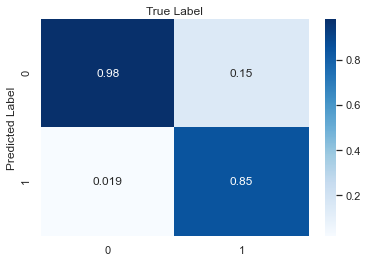

In [45]:
cm = confusion_matrix(Y_test == 1, predict_test).T
cm = cm.astype('float')/cm.sum(axis=0)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

Compute accuracy on training dataset

In [69]:
trainning_a = accuracy_score(Y_train, Gaussian_NB_grid_search.predict(X_train))

Compute main metrics on testing dataset

In [59]:
a, p, r, f, auc = accuracy_score(Y_test, predict_test), precision_score(Y_test, predict_test), recall_score(Y_test, predict_test), f1_score(Y_test, predict_test), roc_auc_score(Y_test, predict_test)

In [72]:
# initialize data of lists.
data = {'training_accuracy_score':[trainning_a],
        'testing_accuracy_score':[a],
        'testing_precision_score':[p],
        'testing_recall_score':[r],
        'testing_f1_score': [f],
        'testing_auc_score':[auc]
       }
 
# Creates pandas DataFrame.
model_result_df = pd.DataFrame(data, index =['Gaussian_Naive_Bayesian'])

In [73]:
model_result_df

,training_accuracy_score,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_f1_score,testing_auc_score
Gaussian_Naive_Bayesian,0.937186,0.929825,0.965517,0.848485,0.903226,0.914719


To visualize the performance of a specific model, roc_curve can be used. However, we would leave this for another session.

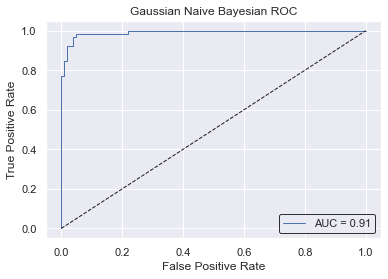

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, Gaussian_NB_grid_search.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayesian ROC')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

Feature Importance can be evaluated with Permutation Feature Importance function

In [86]:
from sklearn.inspection import permutation_importance


In [91]:
features = list(X_test.columns)

In [92]:

imps = permutation_importance(Gaussian_NB_grid_search, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. concave_points_worst (0.056140)
2. smoothness_sd_error (0.052632)
3. concave_points_sd_error (0.026901)
4. concavity_worst (0.019883)
5. texture_mean (0.009357)
6. smoothness_mean (0.008187)
7. symmetry_sd_error (0.003509)
8. area_sd_error (0.001170)
9. fractal_dimension_worst (0.000000)
10. compactness_mean (0.000000)
11. texture_sd_error (0.000000)
12. area_mean (0.000000)
13. area_worst (0.000000)
14. smoothness_worst (0.000000)
15. compactness_sd_error (0.000000)
16. compactness_worst (0.000000)
17. concavity_mean (0.000000)
18. concavity_sd_error (0.000000)
19. symmetry_worst (-0.001170)
20. symmetry_mean (-0.001170)
21. perimeter_worst (-0.001170)
22. radius_worst (-0.002339)
23. fractal_dimension_sd_error (-0.003509)
24. concave_points_mean (-0.003509)
25. texture_worst (-0.004678)
26. fractal_dimension_mean (-0.004678)
27. radius_sd_error (-0.007018)
28. perimeter_sd_error (-0.008187)
29. perimeter_mean (-0.008187)
30. radius_mean (-0.008187)


#### Logistics Regression

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

For Logistics Regression, we tune 2 hyperparameters to be the solver and the regularization C.

In [65]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
Logistics_Regression_grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
Logistics_Regression_grid_result = Logistics_Regression_grid_search.fit(X_train, Y_train)

Evaluate model using the same metrics with Gaussian Naive Bayesian

In [75]:
predict_test = Logistics_Regression_grid_search.predict(X_test)

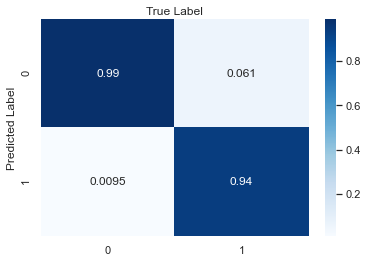

In [76]:
cm = confusion_matrix(Y_test == 1, predict_test).T
cm = cm.astype('float')/cm.sum(axis=0)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

Compute accuracy on training dataset

In [77]:
trainning_a = accuracy_score(Y_train, Logistics_Regression_grid_search.predict(X_train))

Compute main metrics on testing dataset

In [78]:
a, p, r, f, auc = accuracy_score(Y_test, predict_test), precision_score(Y_test, predict_test), recall_score(Y_test, predict_test), f1_score(Y_test, predict_test), roc_auc_score(Y_test, predict_test)

In [83]:
data = {'training_accuracy_score':[trainning_a],
        'testing_accuracy_score':[a],
        'testing_precision_score':[p],
        'testing_recall_score':[r],
        'testing_f1_score': [f],
        'testing_auc_score':[auc]
       }
 
# Creates pandas DataFrame.
result_df = pd.DataFrame(data, index =['Logistics_Regression'])
model_result_df = model_result_df.append(result_df)

In [84]:
model_result_df

,training_accuracy_score,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_f1_score,testing_auc_score
Gaussian_Naive_Bayesian,0.937186,0.929825,0.965517,0.848485,0.903226,0.914719
Logistics_Regression,0.972362,0.970760,0.984127,0.939394,0.961240,0.964935


We find that the logistics regression outperform the Gaussian Naive Bayesian baseline.

To visualize the performance of a specific model, roc_curve can be used. However, we would leave this for another session.

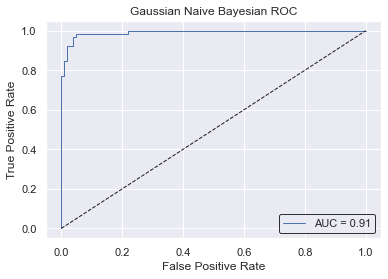

In [85]:
fpr, tpr, thresholds = roc_curve(Y_test, Gaussian_NB_grid_search.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayesian ROC')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

The feature importance of Logistics Regression can be estimated with the coefficients of trained model. The higher the magnitude of the coefficients, the more important the feature is:

In [97]:
importances = np.abs(Logistics_Regression_grid_search.best_estimator_.coef_[0])
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. radius_mean (5.690519)
2. area_worst (5.075666)
3. fractal_dimension_sd_error (3.278140)
4. fractal_dimension_mean (3.212674)
5. symmetry_worst (2.912269)
6. symmetry_sd_error (2.049387)
7. perimeter_mean (1.923342)
8. symmetry_mean (1.653981)
9. perimeter_sd_error (1.615922)
10. concavity_worst (0.927634)
11. compactness_mean (0.895372)
12. texture_worst (0.889857)
13. texture_sd_error (0.866113)
14. perimeter_worst (0.845462)
15. compactness_sd_error (0.783154)
16. concave_points_mean (0.776535)
17. smoothness_mean (0.749969)
18. area_sd_error (0.463398)
19. radius_sd_error (0.440214)
20. radius_worst (0.430884)
21. compactness_worst (0.197037)
22. concavity_sd_error (0.174110)
23. smoothness_worst (0.134067)
24. smoothness_sd_error (0.129591)
25. concave_points_sd_error (0.113605)
26. concavity_mean (0.091775)
27. area_mean (0.046840)
28. texture_mean (0.026664)
29. fractal_dimension_worst (0.024340)
30. concave_points_worst (0.008020)


## Summary

### Development summary for technical audiences:

In this work, we have performed 1) statistical analysis to understand the data distribution and identify predictive variables; 2) build simple models with a baseline (Gaussian Naive Bayesian) and compare with logistics regression algorithm. 3) we have identified important features in each of the models. 

For the next development work, there are 2 important tasks to be done:

1) Based on feature importance, remove redundant features to simplify the model and reduce potential overfitting using methods such as Recursive feature elimination.
2) Explore more advanced algorithms such as decision tree or neural network.
3) Build a machine learning end-to-end pipeline to automatically read data from datasource, train model and output result to a development table.

### Model summary for non-technical audiences:

In the first phrase of the project, we analyze data distributions and build a statistical model and a machine learning model for the task of classifying diagnosis into malignant and benign groups.


<u>1. Statistical Model<u>

We analyze data and find that there are significant difference in data distributions between malignant and benign diagnosises on majority of features (26/30)

'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean','texture_sd_error', 'texture_worst', 'perimeter_mean','perimeter_sd_error', 'perimeter_worst', 'area_sd_error','smoothness_mean', 'smoothness_sd_error', 'compactness_mean','compactness_sd_error', 'compactness_worst', 'concavity_sd_error','concavity_worst', 'concave_points_mean', 'concave_points_sd_error','concave_points_worst', 'symmetry_mean', 'symmetry_sd_error','symmetry_worst', 'fractal_dimension_mean','fractal_dimension_sd_error', 'fractal_dimension_worst'

This motivates us to apply a statistical prediction method, namely Gaussian Naive Bayesian, to estimate the probability distribution of feature values in each group. Using these probability distributions, we can infer the probability of each data instance to be malignant or benign. The Gaussian Naive Bayesian method uses this probability to classify diagnosis and it is able to achieve an accuracy of 92% in our testing dataset. We find that the most important features in Gaussian Naive Bayesian heping to discriminate the 2 classes are:
1. concave_points_worst 
2. smoothness_sd_error
3. concave_points_sd_error 
4. concavity_worst 
5. texture_mean 
6. smoothness_mean 
7. symmetry_sd_error 
8. area_sd_error 

<u>2.Machine learning model <u/>

To improve the accuracy of our classification engine, we develop a machine learning model, namely logistics regression. Different from the statistical model in which we try to estimate feature distributions, the machine learning model optimizes an analytic function in respect to a loss function in our training data. With a well defined objective function, our machine learning model is able to achieve an accuracy of 97%, which is supiorior to the Gaussian Naive Bayesian. By analyzing the model, we can determine the main decisive factors of the model to be:
    
1. radius_mean
2. area_worst 
3. fractal_dimension_sd_error 
4. fractal_dimension_mean
5. symmetry_worst 
6. symmetry_sd_error
7. perimeter_mean 
8. symmetry_mean
9. perimeter_sd_error 
10. concavity_worst 

# Part 2: Feedback

To test student's code, we first create 'data' folder and copy 'train.csv' to it.

In [105]:
import shutil

In [104]:
os.mkdir(os.path.join(os.getcwd(),'data'))

In [106]:
shutil.copy2(os.path.join(os.getcwd(),'part-2-dataset', 'part-2-data.train.csv'), os.path.join(os.getcwd(),'data', 'train.csv'))

'C:\\Users\\teah1\\Downloads\\DSI-Instructor-Challenge\\data\\train.csv'

To mimic the current directory of student's script, we change the directory to be inside 'part-2-student-samples'

In [107]:
os.chdir(os.path.join(os.getcwd(),'data'))

In [108]:
os.getcwd()

'C:\\Users\\teah1\\Downloads\\DSI-Instructor-Challenge\\data'

Let us have a peek on the data

In [125]:
df = pd.read_csv('../data/train.csv')


In [130]:
df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,66190726,Senior Optometrist Ebbe Vale,This is an excellent opportunity for a dedicat...,Ebbe Vale,UK,part_time,NaN,NaN,Healthcare & Nursing Jobs,"52,000 per year",52000,careworx.co.uk
9996,66190728,Domiciliary Optometrist Kent,Domiciliary Optometrist Kent The Company prid...,Kent,Kent,part_time,NaN,NaN,Healthcare & Nursing Jobs,"60,000 per year",60000,careworx.co.uk
9997,66190734,Optometrist Job Hastings,This is an excellent opportunity for a dedicat...,"Hastings, East Sussex",Hastings,part_time,NaN,NaN,Healthcare & Nursing Jobs,"50,000 per year",50000,careworx.co.uk
9998,66190736,Optometrist Job Doncaster,This is an excellent opportunity for a dedicat...,Doncaster,Doncaster,part_time,NaN,NaN,Healthcare & Nursing Jobs,"35,000 to 60,000 per year",47500,careworx.co.uk


In [131]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   Title               9999 non-null   object
 2   FullDescription     10000 non-null  object
 3   LocationRaw         10000 non-null  object
 4   LocationNormalized  10000 non-null  object
 5   ContractType        3556 non-null   object
 6   ContractTime        4737 non-null   object
 7   Company             5951 non-null   object
 8   Category            10000 non-null  object
 9   SalaryRaw           10000 non-null  object
 10  SalaryNormalized    10000 non-null  int64 
 11  SourceName          10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


Based on the dataset and the script, we can infer the task given to students to be predict the "SalaryNormalized" based on "ContractType" of the users using linear regression.

### Feedback to all students

Some common bugs/mistakes in the code include:

+ <font color='red'>ImportError</font> and <font color='red'>ModuleNotFoundError</font>: some students specify the wrong path of the modules.

For example: 

<u>wrong import</u> : ```from sklearn.cross_validation import cross_val_score```
    
<u>correct import</u> : ```from sklearn.model_selection import cross_val_score```

<u>*Debug steps</u>: 1) type "cross_val_score sklearn" in google search (or any search engine). This takes you to the first result from the official scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html. 2) click on the link and scroll down to the Examples to find the correct import.

+ <font color='red'>ValueError: 'mean_absolute_error' is not a valid scoring value</font>. This error come from confusion of students between available scoring value and the name of scoring function.

<u>*Debug steps</u>: 1) type "mean_absolute_error scoring cross_val_score" in google search (or any search engine). This takes you to the first result from the official scikit-learn https://scikit-learn.org/stable/modules/model_evaluation.html. 2) From the table in the link, we find the valid value for mean_absolute_error to be ‘neg_mean_absolute_error’. Notice that in cross-validation framework, it is the default to consider maximization of the score, hence to minimize the mean_absolute_error, we turn it into the problem of maximize the negative mean absolute value.

#### student-sample-1.py

In [147]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())


ImportError: cannot import name 'LinearRegression' from 'sklearn' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py)

1. There are 2 main import error in this code: 

    <u>wrong import</u> : ```from sklearn.cross_validation import cross_val_score```

    <u>wrong import</u> : ```from sklearn import LinearRegression```

    We need to fix it by replacing them with the correct version:

    <u>correct import</u> : ```from sklearn.linear_model import LinearRegression```

    <u>correct import</u> : ```from sklearn.model_selection import cross_val_score```

    For the next time, if the student incurs this import error, please use google search to go to the official scikit website to get the correct import from their examples:).

    For example, to find the correct way to import LinearRegression, the student can try keyword "LinearRegression sklearn" in google search to get the official document https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.
    
 2. Although it is not a bug, it is redundant to import the same library multiple times. For example, the student imported ```from sklearn.cross_validation import cross_val_score``` 2 times at the beginning of the script and beginning of evaluate model part.
 
 3. It might be a typo that ```d = pd.read_csv('../data/train.csv')``` should be ```data = pd.read_csv('../data/train.csv')```
 
 4. There are 2 bugs in the command ```scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')```. First, the student should change the scoring function to the valid function ‘neg_mean_absolute_error’. Secondly, cv parameter needs value greater than 1. It is good practice to use the default value ```cv=5```.


Let us put everything together to a correct code

In [155]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
#===========
# let us correct these imports
# from sklearn import LinearRegression
# from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load data
#===========
# let us correct the typo in data frame name
# d = pd.read_csv('../data/train.csv')
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
#===========
# comment the redundant import
# from sklearn.cross_validation import cross_val_score
#===========
# train_test_split is not used, hence we dont need to include
# from sklearn.cross_validation import train_test_split
#===========
# let us correct this scores
# scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
scores = cross_val_score(model, x2, x1, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())


-11822.14023129507


#### student-sample-2.py

In [132]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())


ModuleNotFoundError: No module named 'sklearn.cross_validation'

1. There is an import error in this code: 

    <u>wrong import</u> : ```from sklearn.cross_validation import cross_val_score```

    We need to fix it by replacing them with the correct version:

    <u>correct import</u> : ```from sklearn.model_selection import cross_val_score```

    For the next time, if the student incurs this import error, please use google search to go to the official scikit website to get the correct import from their examples:).

    For example, to find the correct way to import LinearRegression, the student can try keyword "cross_val_score sklearn" in google search. It would take us to examples in https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    

2. There are a bug in the command ```scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')```. The student should change the scoring function to the valid function ‘neg_mean_absolute_error’.


Let us put everything together to a correct code

In [156]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#===========
# let us correct this import
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
# let us correct this scores
# scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
scores = cross_val_score(model, x2, x1, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())


-11822.14023129507
